In [97]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.0)

In [98]:
gpu_data = pd.read_csv('gpu.csv', index_col=0)

(0.0, 0.002)

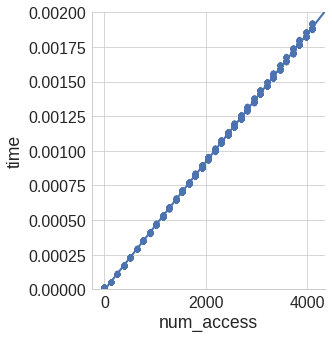

In [99]:
lm = sns.lmplot('num_access', 'time', gpu_data)
lm.axes[0, 0].set_ylim(0e-6, 2e-3)

(2e-06, 6e-05)

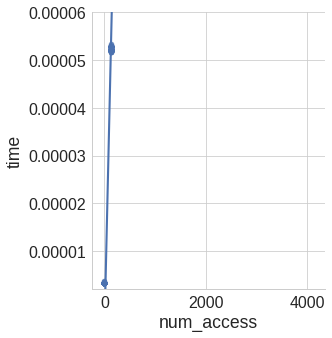

In [100]:
filtered_gpu_data = gpu_data[(gpu_data['time']<0.000015) | (gpu_data['time']>0.000018)]
lm2 = sns.lmplot('num_access', 'time', filtered_gpu_data)
lm2.axes[0, 0].set_ylim(2e-6, 6e-5)

In [101]:
result = sm.ols(formula="time ~ num_access", data=gpu_data).fit()
result.params

Intercept    -5.434390e-06
num_access    4.629867e-07
dtype: float64

### Conclusion
Each dram access takes 380 cycle?

In [102]:
sim_data = pd.read_csv('sim.csv', index_col=0)

In [103]:
full_data = gpu_data.append(sim_data, ignore_index=True)

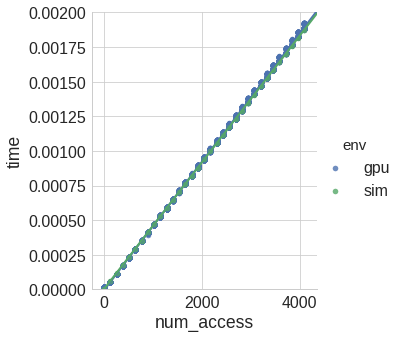

In [104]:
lm3 = sns.lmplot('num_access', 'time', full_data, hue='env')
lm3.axes[0, 0].set_ylim(2e-6, 2e-3)
plt.savefig('dram_microbenchmark.pdf')

### Best configuration

DRAM latency 300
L2 latency 100 + 3(dir lookup)
L1 Latency 1
